## Initialize

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(42)
plt.style.use('fivethirtyeight')
sns.set()
sns.set_context("talk")
%matplotlib inline

# Univariate Linear Regression
Model linear regression based on a data set that contains housing data (USA_Housing.csv). 
Goal: find a model that will allow us to predict hosuing prices given certain values.

###  Read Data

In [4]:
import pandas as pd
df=pd.read_csv('/srv/shared/USA_Housing.csv', sep=',')   # do not download the data files as they may change
df_adjusted = df.drop("Address", axis=1)  # Remove the address column
df_adjusted

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05
...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1.060194e+06
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1.482618e+06
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1.030730e+06
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1.198657e+06


### Split Data into training and test data sets

In [5]:
## Split the data, df_adjusted into training (90%) and testing (10%) using sklearn
from sklearn.model_selection import train_test_split

df_training = train_test_split(df_adjusted, train_size=0.9, random_state=50)[0]
df_testing =  train_test_split(df_adjusted, train_size=0.9, random_state=50)[1]


In [6]:
df_training

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
4056,87295.08843,6.099808,5.548363,2.36,23399.85224,1.116680e+06
2284,59420.35326,4.607793,5.763788,2.25,20691.47878,4.405850e+05
2557,68631.71253,5.152323,6.732552,3.05,39635.82874,1.115722e+06
1030,76774.85779,6.232922,6.396693,2.05,34313.82770,1.384466e+06
283,73839.87242,6.446182,8.274064,4.19,47602.51021,1.912825e+06
...,...,...,...,...,...,...
3330,68735.43661,7.721909,7.621975,5.18,27640.56129,1.521141e+06
70,63538.34616,4.764499,7.168662,3.27,43282.18300,1.146532e+06
132,58118.01816,8.137214,5.650900,4.36,35598.39044,1.246247e+06
2014,74367.54263,5.356907,5.906375,4.42,44663.81899,1.155682e+06


In [7]:
df_testing

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
3431,50570.86481,5.828143,4.851423,4.36,40580.09229,6.129387e+05
2042,65314.72011,6.918945,6.245656,2.42,36565.02983,1.347083e+06
79,64419.25264,6.954422,8.516160,6.16,39318.17075,1.492011e+06
4663,60390.50286,5.195406,8.368913,6.27,37921.72059,1.223915e+06
3640,73068.51810,7.271422,5.685408,3.14,42929.87616,1.368692e+06
...,...,...,...,...,...,...
4926,59979.98691,5.367790,7.287304,6.27,33072.60529,9.800494e+05
3699,76545.78583,5.128212,7.247376,5.12,50480.96295,1.578141e+06
3301,77013.18060,7.398134,7.517189,5.23,43432.87979,1.890056e+06
3324,81988.54904,6.901877,7.588075,6.38,29277.34641,1.689691e+06


###  Normalize Data
Normalize df_training data using MinMaxScaler from sklearn.preprocessing so data columns are to be between 0 and 1.
 X_scaled_values are the normalized x values of housing data and Y_scaled_values are the scaled values of prices.

In [8]:
### BEGIN ANSWER
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

X_scaled_values = scaler.fit_transform(df_training.iloc[:,:-1])
Y_scaled_values = scaler.fit_transform(df_training.iloc[:,[-1]])

### END ANSWER


# call the scaled vectors x and y
x = X_scaled_values
y = Y_scaled_values


###  Define the square loss (L2) function
Define the function, sqerror that computes the error based on the arguments provided. Use the function h(theta) is as defined above. Assume that x and y are the observed vectors. We use the average square loss or L2 loss in this case. 

In [15]:
import numpy as np

## BEGIN ASNWER
x=pd.DataFrame(x)
def sqerror(x, y, theta0, theta1):
    """
    Input: parameters theta0 and theta1 of the model
    Input: x, y vectors
    Returns: average L2 square error
    Assumptions: none
    """
    sqerror = 0
    for i in range(len(x)):
        sqerror +=  (y[i] - h(theta0,theta1,x[i]))**2
    return sqerror/len(x)
    
## END ANSWER

## testing
print(sqerror(x[0], y, 0.29,0.52))
print(sqerror(x[1], y, 0.29,0.52))

[0.02096558]
[0.01885145]


### Activity 2.2 - Define the L1 Absolute error function
Define the function, abserror that computes the avarega absolute error based on the arguments provided. The function h(theta) is as defined above. Assume that x and y are the observed vectors. We use the average abssolute error in this case.

In [16]:
import numpy as np
import math

## BEGIN ANSWER
def abserror(x, y, theta0, theta1):
    """
    Input: parameters theta0 and theta1 of the model 
    Input: x, y vectors
    Returns: average L1 error
    Assumptions: none
    """
    abserror = 0 
    for i in range(len(x)):
        abserror += abs(h(theta0, theta1, x[i]) - y[i])
    return abserror/len(x)
## END ANSWER

## testing
print(abserror(x[0], y, 0.29,0.52))
print(abserror(x[1], y, 0.29,0.52))

[0.11735832]
[0.10961637]


### Define Pseudo Huber loss function

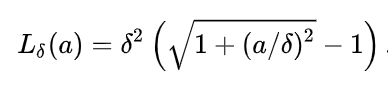



In [17]:
import numpy as np
import math

## BEGIN ANSWER
def huberror(x, y, theta0, theta1, delta):
    """
    Input: parameters theta0, theta1 and delta of the model 
    Input: x, y vectors
    Returns: psuedo huber error
    Assumptions: none
    """
    error = 0
    for i in range(len(x)):
        a = abs(y[i] - h(theta0, theta1,x[i]))
        if a <= delta:
            error += (1/2) * (a**2)
        else:
            error += delta * (a - ((1/2) * delta))
    return error/len(x)

## END ANSWER

## testing
print(huberror(x[0], y, 0.29,0.52,0.1))
print(huberror(x[1], y, 0.29,0.52,0.1))

[0.00760148]
[0.00690864]


### Comparison of theta0 and theta1 for each loss


In [18]:
!pip install ipywidgets

Defaulting to user installation because normal site-packages is not writeable


In [19]:
from ipywidgets import interact
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [20]:
# interactive panel
import pylab
import numpy



def f(theta0, theta1):
    """
    Plot the line and points in an interactive panel
    """
    # plot the line for theta0 and theta1
    x1 = x[0]
    y1 = h(theta0, theta1, x1) 
    # compose plot
    pylab.plot(x1,y1) 
    
    # compute the L2 error or sqerr for theta0 and theta1 for 5 decimal places
    sqerr = numpy.round(sqerror(x1, y, theta0, theta1),6)
    
    # compute the absolute or L1 error or abserr for theta0 and theta1
    abserr = numpy.round(abserror(x1, y, theta0, theta1),4)
    
    # compute the huber error for theta0 and theta1
    huberr = numpy.round(huberror(x1, y, theta0, theta1, 0.01),4)
    pylab.title('L1=' + str(abserr) + '  L2=' + str(sqerr) + '  hub=' + str(huberr))
    
    # plot the points
    pylab.scatter(x1, y, alpha=0.5)
    pylab.show() # show the plot

interact(f, theta1=(0,1,0.1), theta0=(0,1,0.1));

interactive(children=(FloatSlider(value=0.0, description='theta0', max=1.0), FloatSlider(value=0.0, descriptio…

In [21]:
# BEST VALUES FOR AVE SQUARE ERROR
theta0 = 0.1
theta1 = 0.7
error = 0.0891
# BEST VALUES FOR AVE ABS ERROR
theta0 = 0.2
theta1 = 0.6
error = 0.0146

# BEST VALUES FOR AVE HUBER ERROR
theta0 = 0.2
theta1 = 0.6
error = 0.0009

# Gradient Descent - Univariate
 The iterative formulas using L2 loss function for theta0 and theta1 are given by:
$$
\theta_0 = \theta_0 - \alpha*(\sum(\theta_1*x^j + \theta_0)-y^j)
$$
$$
\theta_1 = \theta_1 - \alpha*(\sum(\theta_1*x^j + \theta_0 - y^j)*x^j
$$


### Compute Parameters using the Gradient Descent algorithm (L2 loss)



In [22]:
# given the observed data (obsX,obsY), learning rate (alpha), and desired error threshold, 
# the function returns theta0 and theta1 when it reaches the error threshold.
# The convergence is reached when the abs(newError - oldError) is less than the threshold.

y2 = pd.DataFrame(y)
# BEGIN ANSWER  
def gd2(obsX, obsY, alpha, threshold):
    """
    Input : observed vectors X, Y, alpha and threshold
    Return theta0, theta1 from Gradient Descent L2 loss algorithm
    Return: Iterations and L2 Error
    """
    theta0 = 0
    theta1 = 0
    iterations = []
    print_theta0 = theta0
    print_theta1 = theta1
    olderror = 0
    newerror = 0
    error = sqerror(obsX,obsY,theta0,theta1)
    
    flag = 1
    while flag>0:
        olderror = newerror
        print_theta0 = print_theta0 - alpha * ((print_theta0 * obsX + print_theta0) - obsY).mean()
        print_theta1 = print_theta1 - alpha * (((print_theta1 * obsX + print_theta0) - obsY)*obsX).mean()
        newerror = sqerror(obsX,obsY,print_theta0,print_theta1)
        temp = "theta0= " + str(print_theta0) + " theta1= " + str(print_theta1) + " error = " + str(newerror)
        iterations.append(temp)
        if abs(newerror-olderror) < threshold:
            flag = 0

    return print_theta0,print_theta1,newerror,iterations
    
    
# END ANSWER
[theta0,theta1,newError,iterations] = gd2(x[1],y2[0],0.01,0.0001)
print(iterations)

['theta0= 0.004959119373723786 theta1= 0.0024772351998573502 error = 0.2607456630851719', 'theta0= 0.009844581713151555 theta1= 0.0049244142323735555 error = 0.2547880115984789', 'theta0= 0.01465748103483996 theta1= 0.007341966251872358 error = 0.2489879783637447', 'theta0= 0.019398895106086677 theta1= 0.009730314082755907 error = 0.24334121344124263', 'theta0= 0.024069885686278127 theta1= 0.01208987431340874 error = 0.23784349004623326', 'theta0= 0.02867149876465252 theta1= 0.014421057388707324 error = 0.23249070100632874', 'theta0= 0.03320476479453142 theta1= 0.016724267701155832 error = 0.22727885532176792', 'theta0= 0.03767069892407233 theta1= 0.018999903680668607 error = 0.22220407482559873', 'theta0= 0.042070301223593926 theta1= 0.021248357883019375 error = 0.21726259094083883', 'theta0= 0.04640455690952486 theta1= 0.02347001707697703 error = 0.21245074153179885', 'theta0= 0.0506744365650263 theta1= 0.025665262330147497 error = 0.207764967846794', 'theta0= 0.0548808963573376 thet

In [23]:
# observe theta0 and theta1
theta0, theta1

(0.3126119282163532, 0.20210912916534915)

### Compute Gradient Descent (Huber)

In [24]:
# given the observed data (obsX,obsY), learning rate (alpha), and desired error, 
# the function returns theta0, theta1, error and iterations
# that reaches a minimum error threshold

## BEGIN ANSWER

huber = []

def gdh(obsX, obsY, alpha, threshold, delta):
    """
    Input : observed vectors X, Y, alpha and threshold
    Return theta0, theta1 from Gradient Descent huber loss algorithm
    Return: Iterations and huber Error
    """
    theta0 = 0
    theta1 = 0
    temp = 0
    new = 1
    iteration_count = 0
    flag = 1
    while flag>0:
        theta0 = theta0 - alpha*np.sum((theta1*obsX+theta0) - obsY)/obsX.size
        theta1 = theta1 - alpha*np.sum((theta1*obsX+theta0-obsY)*obsX)/obsX.size
        print("theta0",theta0)
        print("theta1", theta1)
        temp = new
        iteration_count += 1
        huber.append(iteration_count)
        new = huberror(obsX, obsY, theta0, theta1, 0.1)
        print("error", new)
        print("________")
        huber.append(new)
        if abs(temp - new) < threshold:
            flag=0
    return [theta0, theta1, new, iteration_count]
## END ANSWER

[theta0,theta1,newError,iterations] = gdh(x[1],y2[0],0.01,0.000001,0.01)
print(iterations, newError)

theta0 0.004959119373723787
theta1 0.0024772351998573507
error 0.04397916928774015
________
theta0 0.009856625913807444
theta1 0.004924355783727577
error 0.0433713749483302
________
theta0 0.014693281890168611
theta1 0.007341734216974954
error 0.042771206366132096
________
theta0 0.019469840142508858
theta1 0.009729738357127822
error 0.04217860121382122
________
theta0 0.02418704419697695
theta1 0.012088731510883128
error 0.04159349838551838
________
theta0 0.02884562838138887
theta1 0.014419072490405766
error 0.04101582020292801
________
theta0 0.033446317939022405
theta1 0.01672111566893142
error 0.0404454852452568
________
theta0 0.03798982914100398
theta1 0.018995211035681518
error 0.03988240344690848
________
theta0 0.042476869397305106
theta1 0.02124170425009885
error 0.039326490771109564
________
theta0 0.04690813736636566
theta1 0.023460936695412198
error 0.03877767181512687
________
theta0 0.05128432306336106
theta1 0.025653245531538315
error 0.03823588723964585
________
theta

### The values of theta0, theta1, alpha, error that provided the minimum value through gradient descent

   - huber: theta0 0.38716661212426473, theta1 0.20526239023964343, error 0.006673921071458025
   - sqerror: theta0 0.3487025522374391, theta1 0.1792926940264689, error 0.021831363777721154



#  Extending the Model to a Bivariate
Extend the model to predict housing price using two features "$x_1 = $Avg. Area House Age" and "$x_2 = $Avg. Area Number of Rooms". The regression model is then defined by  
$$
y = \theta_2*x_2 + \theta_1*x_1 + \theta_0
$$


Estimate the values of $\theta_2, \theta_1, \theta_0$. 
The $\theta_0$ formula is given below (using L2 norm). 

$$
\theta_0 = \theta_0 - \alpha*(\sum(\theta_2*x_2^j + \theta_1*x_1^j + \theta_0)-y^j)
$$





## Compute Parameters using the Gradient Descent Algorithm (L2 loss)
Print out the $\theta_0$, $\theta_1$ and $\theta_2$ values for each iteration in your function. You may get different outputs depends on your initial choice of $\theta_0$, $\theta_1$ and $\theta_2$ values. We will accept any answers which are close to the sample output.

In [27]:
# given the observed data (obsX,obsY), learning rate (alpha), and desired error threshold, 
# the function returns theta0, theta1 and theta2 when it reaches the error threshold.
# The convergence is reached when the abs(newError - oldError) is less than the threshold.

# BEGIN ANSWER
"""
    Input : observed vectors X, Y, alpha and threshold
    Return theta0, theta1, theta2 from Gradient Descent L2 loss algorithm
    Return: Iterations and L2 Error
"""
def f(theta0, theta1, theta2, x1, x2):
    return theta0 + theta1*x1 + theta2*x2

def k0(theta0, theta1, theta2, x1, x2, y):
    output = 2*(f(theta0, theta1, theta2, x1, x2) - y)
    return output.mean()

def k1(theta0, theta1, theta2, x1, x2, y):
    output = 2*(f(theta0, theta1, theta2, x1, x2) - y)*x1
    return output.mean()

def k2(theta0, theta1, theta2, x1, x2, y):
    output = 2*(f(theta0, theta1, theta2, x1, x2) - y)*x2
    return output.mean()

def bierror(x1, x2, y, theta0, theta1, theta2):
    output = (f(theta0, theta1, theta2, x1, x2) - y) ** 2
    return output.mean()
#def gd22(obsX, obsY, alpha, threshold):
"""
Input : observed vectors X, Y, alpha and threshold
Return theta0, theta1, theta2 from Gradient Descent L2 loss algorithm
Return: Iterations and L2 Error
"""
def gd22(obsX, obsY, alpha, threshold):
    alp = alpha
    theta0 = 1
    theta1 = 1
    theta2 = 1
    iter = 0
    x1 = obsX[0]
    x2 = obsX[1]
    newError = bierror(x1, x2, obsY, theta0, theta1, theta2)
    oldError = 1
    flag = 1 
    
    while (flag > 0):
        iter = iter + 1
        d_theta0 = k0(theta0,theta1,theta2, x1, x2,obsY)
        d_theta1 = k1(theta0,theta1,theta2, x1, x2,obsY)
        d_theta2 = k2(theta0,theta1,theta2, x1, x2,obsY)
        theta0 = theta0 - alp * d_theta0
        theta1 = theta1 - alp * d_theta1
        theta2 = theta2 - alp * d_theta2
        oldError = newError
        newError = bierror(x1, x2, obsY, theta0, theta1, theta2)
        
        if(abs(newError - oldError) < threshold):
            flag = 0
            
    return theta0, theta1, theta2, newError, iter


# END ANSWER
[theta0,theta1,theta2, newError,iterations] = gd22(x[1],y2[0],0.01,0.0001)
print(iterations, newError)
print(theta0, theta1, theta2)
    

127 0.022671356286930074
0.06260736854462268 0.5288341206756751 0.7322737609565731


The values of thetas obtained from function above:
$$\theta_0 =0.06260736854462268$$   
$$\theta_1 =0.528834120675675$$
$$\theta_2 =0.7322737609565731$$ 

The model 
$$
y = 0.7322737609565731*x_2 + 0.528834120675675*x_1 + 0.06260736854462268
$$

## Predict the Housing Price using test set data - gradient descent
Using the test set to find the estimated value of the home $y$ using coefficients received from gradient descent. Defined the average error as 1/m * $\sum$ abs(predicted - actual) where m is the size of the test data set.

In [1]:
## Begin ANSWER
from sklearn.preprocessing import MinMaxScaler

def predGrad(row, grad_theta0, grad_theta1, grad_theta2):
    return grad_theta0 + (float(row[1]) * grad_theta1) + (float(row[2]) * grad_theta2)

scalar = MinMaxScaler()
np_scaled = scalar.fit_transform(df_testing)
df_testing_normalized = pd.DataFrame(np_scaled)

theta0_gd = theta0
theta1_gd = theta1
theta2_gd = theta2
pred_gd = pd.DataFrame()

pred_gd['actual'] = df_testing_normalized.iloc[:, 2]
pred_gd['predicted'] = df_testing_normalized.apply(lambda x: predGrad(x, theta0_gd, theta1_gd, theta2_gd), axis = 1)
pred_gd


## End ANSWER
m = len(df_testing_normalized)
error_gd = (1/m) * np.sum(np.absolute(pred_gd['predicted'] - pred_gd['actual']))
print(error_gd)


NameError: name 'df_testing' is not defined

@2023 All Rights Reserved. Lab Developed by A.D. Gunawardena for CS 439. DO NOT post a copy of this lab or solutions in public space such as github or on commercial sites. 